# Project: Investigate a Dataset (Film earnings and reviews)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've chosen to review the TMDb movie data.  This data set includes 10,000 movies collected from The Movie Databas (TMDb), including user ratings and reviews.  I've chosen this data set because I'm primarily interested in understanding the relationship between popularity (earnings) and quality (reviews).  I would like to consider each of these as dependent variables and gain insight into what might be associated with either popularity or quality in isolation first.  I would then like to consider how these two *measures of success* relate to each other.

> Therefore the key questions I would like to investigate further are as follows:

>> 1. What features are associated with higher or lower overall earnings?
>> 2. What features are associated with higher or lower overall ratings?
>> 3. Is there a relationship between earnings and rates and if so is this due to similar characteristics?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

My initial step before understanding the qualities and nature of each attribute was simply an quick overview and consideration of relevant fields needed to answer my key questions.  A deeper assesment of the data and cleaning will take place at a later point.

### General Properties

Initially I pulled in the raw data set using pandas read_csv functionality and subsequently pulled the first five records to get a feel for the format, type and complexity of the various attributes.  While there appear to be various options for alternate indexing including either *id* or *imdb_id* I do not believe these will be necessary for the analysis and would like to remove these columns along with *original_title*, *homepage*, *tagline* and *overview* as these fields seem more relevant to advanced NLP analysis.

Its clear that while *cast*, *genres* and *production_companies* need some consideration on how to split out, thus leaving them as a range of possible groupby attributes to understand a deeper level of the data.  This will require some addtional thinking and work to address later on.

In [40]:
df = pd.read_csv('tmdb-movies.csv')
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [41]:
df.drop(['id','imdb_id','original_title','homepage','tagline','overview'], axis = 1, inplace = True)
df.head()

popularity     budget     revenue  \
0   32.985763  150000000  1513528810   
1   28.419936  150000000   378436354   
2   13.112507  110000000   295238201   
3   11.173104  200000000  2068178225   
4    9.335014  190000000  1506249360   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

### Data Cleaning

Here I would like to explore more holistically the data set, with the extra fields removed.  Focus will be on making sure fields are consistent, in the proper format (float, string, integer), removing duplicates and addressing any null values for each field.  Equally we will want to do a basic visual exploration of the data to get a feel for distributions and any material skewness or significant outliers that need consideration at this stage.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null int32
revenue_adj             10866 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(5)
memory usage: 1.2+ MB


#### Datatypes

Datatype changes needed as follows:
    
    1. release_date changed to a date from string
    2. budget_adj change to integer from float so it is consistent with budget above
    3. revenue_adj change to integer from float so it is consistent with budget above

In [55]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null int32
revenue_adj             10866 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(5)
memory usage: 1.2+ MB


#### Null values & Duplicates

Currently it looks like the only fields with null values are strings.  Currently I do not feel it would be appropriate to try and fill these as they are non numerical and instead would represent key categories by which to group the data.  As such I have choosen to simply drop all null value records.

Equally here I've looked identified and dropped any duplicated records as each film should only appear once, noting even mislabeled sequels would have different features such as cost, revenue, release date etc...

In [57]:
df.dropna(inplace = True)
df.shape

(8667, 15)

In [61]:
df.drop_duplicates(inplace = True)
df.shape

(8666, 15)

#### Skewness, distribution and outliers

I've done a very basic initial histogram exploration to understand how the different numerical data points are represented across the new reduced data set.  There remains a significant data field issue to address regarding the fields *cast*, *keywords*, *genres*, *production_companies* which will be addressed using the same approach as a final step in the cleaning process.  While this was done to just check if any additional cleaning is needed, I did note things that popped immediately to me.

> Interesting observations on the distribution as follows:

> 1. Overall budgets are very skewed to the right but equally so is popularity, which might initially suggest that generally there is a small number of films that have very wide reach and appeal with the bulk of filmaking taking place at the lower end of the budget spectrum with a generally more limited audience.

> 2. Release years is skewed to the left suggesting a marked increase in film releases over time, this seems reasonable but equally this doesn't seem to align with any of the other measures such as budget, popularity or revenue suggesting that although volume overall has increased, high earning, expensive or popular films still remain the exception rather than the rule.

> 3. Run time seems to be a pretty tight normal distribution suggesting over time films have remains the same length, so this might be something less interesting to explore

> 4. Average vote score looks to be nicely distirbuted round roughly 6 with an even tail on either end (normal distirbution).  This gives me confidence that overall ratings are pretty much reliable as there is no overall biase towards generally low or generally high rartings.  Thus a 10 would be exceptional and a 1 would equally be dismall.

> 5. Most films look to have only a small number of votes as noted in the expanded votes graph with a tighter bin size.

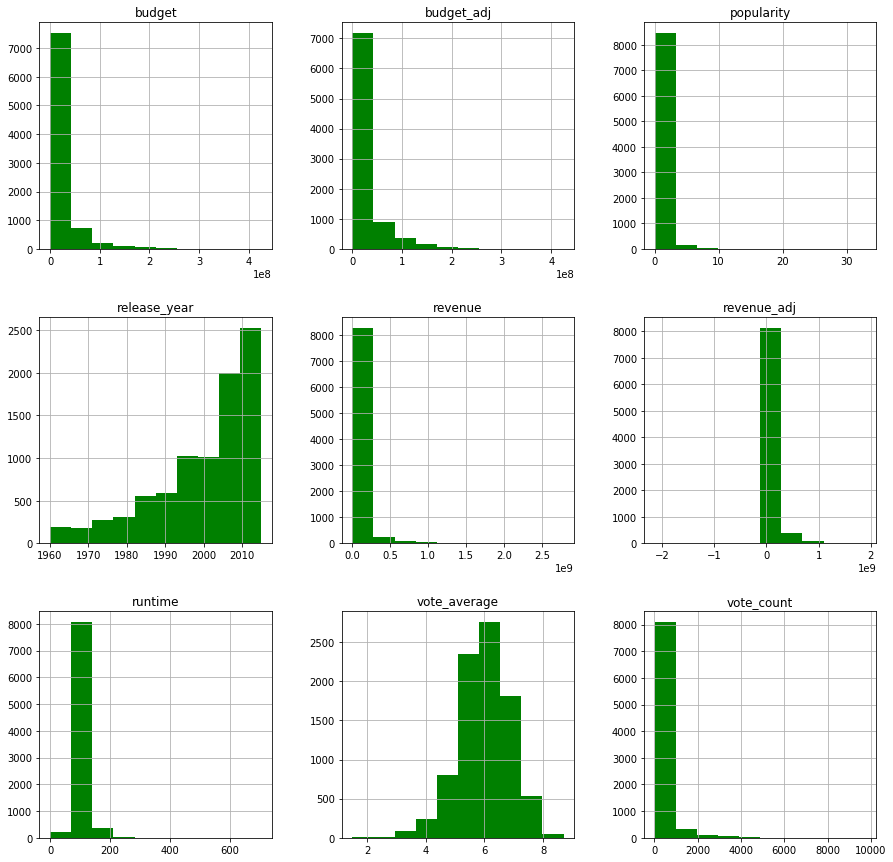

In [66]:
df.hist(figsize=(15,15), color = 'g');

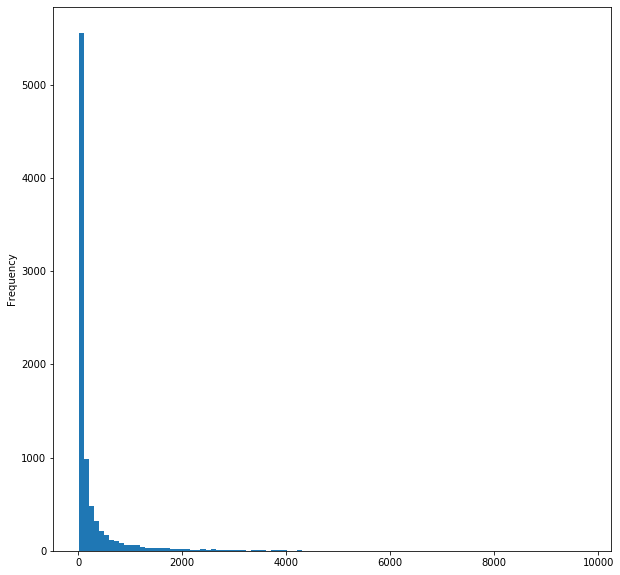

In [69]:
df.vote_count.plot(kind='hist',bins = 100, figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!